### Задание 1: Байесовские рассуждения

Рассмотрим модель посещаемости студентами ВУЗа одной лекции по курсу. 

* $\mathbf{a}$ - количество студентов на профильном факультете
* $\mathbf{p_1}$ - вероятность посещения лекции студентом профильного факультета
* $\mathbf{b}$ - количество студентов других факультетах
* $\mathbf{p_2}$ - вероятность посещения лекции студентом непрофильного факультета
* $\mathbf{с}$ - количесво студентов, действительно посетивших данную лекцию
* $\mathbf{d}$ - количество студентов, _теоретически_ посетивших данную лекцию
* $\mathbf{p_3}$ - вероятность, с которой студент отмечает своего друга

Вероятностная модель **1**:

$ p(a,b,c,d) = p(d|c)p(c|a,b)p(a)p(b) \\
d|c \sim c+ \mathcal{B}(c,p_3) \\
c|a,b \sim \mathcal{B}(a,p_1) + \mathcal{B}(b,p_2) \\
a \sim \mathcal{R}[a_{min},a_{max}] \\
b \sim \mathcal{R}[b_{min},b_{max}]$

Вероятностная модель **2**:

$ p(a,b,c,d) = p(d|c)p(c|a,b)p(a)p(b) \\
d|c \sim c+ \mathcal{B}(c,p_3) \\
c|a,b \sim \mathcal{Poiss}(ap_1 + bp_2) \\
a \sim \mathcal{R}[a_{min},a_{max}] \\
b \sim \mathcal{R}[b_{min},b_{max}]$

#### Вариант 1
Рассматриваются модели 1 и 2 с параметрами:\
$a_{min} = 75 \\
a_{max} = 90 \\
b_{min} = 500 \\
b_{max} = 600 \\
p_1 = 0.1 \\
p_2 = 0.01 \\
p_3 = 0.3$

Провести cледующие исследования для обеих моделей:
1. Вывести формулы для всех необходимых далее распределений аналитически.

2. Найти математические ожидания и дисперсии априорных распределений $p(a), p(b), p(c), p(d)$.

3. Пронаблюдать, как происходит уточнение прогноза для величины c по мере прихода новой косвенной информации. Для этого построить графики и найти мат.ожидание и дисперсию для распределений $p(c), p(c|a), p(c|b), p(c|d), p(c|a, b), p(c|a, b, d)$ при параметрах $a, b, d$, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого.

4. Определить, какая из величин $a, b, d$ вносит наибольший вклад в уточнение прогноза для величины $c$ (в смысле дисперсии распределения). Для этого проверить верно ли, что $\mathbb{D}[c|d] < \mathbb{D}[c|b]$ и $\mathbb{D}[c|d] < \mathbb{D}[c|a]$ для любых допустимых значений $a, b, d$. Найти множество точек $(a, b)$ таких, что $D[c|b] < D[c|a]$. Являются ли множества {$(a, b) | \mathbb{D}[c|b] < \mathbb{D}[c|a]$} и {$(a, b) | \mathbb{D}[c|b] ≥ \mathbb{D}[c|a]$} линейно разделимыми? Ответ должен быть обоснован!

5. Провести временные замеры по оценке всех необходимых распределений $p(c), p(c|a), p(c|b), p(c|d), p(c|a, b), p(c|a, b, d), p(d)$.

6. Используя результаты всех предыдущих пунктов, сравнить две модели. Показать где максимально проявляется разница между ними (привести конкретный пример, не обязательно из экспериментов выше). Объяснить причины подобного результата.

Взять в качестве диапазона допустимых значений для величины $c$ интервал $[0, a_{max} + b_{max}]$, а для величины $d$ – интервал $[0, 2(a_{max} + b_{max})]$.
Исследование должно быть выполнено на компьютере, однако за дополнительные аналитические выкладки
в пунктах 2-4 будут ставиться дополнительные баллы. При оценке выполнения задания будет учитываться
эффективность программного кода - любая из функций должна работать быстрее секунды на скалярных входах
(для этого код должен реализовываться векторно). По всем пунктам задания должен быть проведен анализ
результатов и сделаны выводы.

Подключим необходимые библиотеки для расчетов

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as spec

import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from Anastasiia_Batsheva_v1 import *

Проверим функции подсчета распределений на открытых тестах:

In [2]:
import BMML1_open_tests

pa, model 1: 	 ok; 	 time: 0.0000 seconds
pa, model 2: 	 ok; 	 time: 0.0000 seconds
pb, model 1: 	 ok; 	 time: 0.0000 seconds
pb, model 2: 	 ok; 	 time: 0.0000 seconds
pc, model 1: 	 ok; 	 time: 0.0195 seconds
pc, model 2: 	 ok; 	 time: 0.0120 seconds
pd, model 1: 	 ok; 	 time: 0.1049 seconds
pd, model 2: 	 ok; 	 time: 0.0801 seconds
pc_a, model 1: 	 ok; 	 time: 0.0120 seconds
pc_a, model 2: 	 ok; 	 time: 0.0140 seconds
pc_b, model 1: 	 ok; 	 time: 0.0055 seconds
pc_b, model 2: 	 ok; 	 time: 0.0047 seconds
pc_d, model 1: 	 ok; 	 time: 0.0846 seconds
pc_d, model 2: 	 ok; 	 time: 0.0952 seconds
pc_ab, model 1: 	 ok; 	 time: 0.0035 seconds
pc_ab, model 2: 	 ok; 	 time: 0.0034 seconds
pc_abd, model 1: 	 ok; 	 time: 0.0879 seconds
pc_abd, model 2: 	 ok; 	 time: 0.0724 seconds


Все корректно.

Определим параметры модели.

In [3]:
params = {'amin' : 75, 'amax' : 90, 
          'bmin' : 500, 'bmax' : 600, 
          'p1' : 0.1, 'p2' : 0.01, 'p3': 0.3}

Реализуем функции для подсчета мат.ожидания и дисперсии, а так же для отрисовки графиков.

In [4]:
def E(prob, val):
    return np.dot(prob.T, val).T

def D(prob, val):
    D_1 = E(prob, val**2)
    D_2 = E(prob, val)**2
    return D_1 - D_2

def show_distribution(distributions, names, title=''):
    """
    plot of the distribution
    """
    plt.figure(figsize=(16, 4))
    plt.title(title)
    for name in names:
        show_dstrb = distributions[name]
        show_val = show_dstrb['val']
        show_prob = show_dstrb['prob'].ravel()
        plt.bar(show_val, show_prob, alpha=0.5, label=name)
        plt.xlim(0, 30)
    
    plt.ylabel('prob')
    plt.xlabel('val')
    plt.legend()
    plt.show()

### 2.
**Найти математические ожидания и дисперсии априорных распределений $p(a), p(b), p(c), p(d)$.**

Все распределения и их характеристики для каждой модели будем сохранять в словарь distributions

In [5]:
distributions = {}
priors = [pa, pb, pc, pd]

for model in (1, 2):
    distributions[model] = {}

    print(f'\nPrior distributions, model {model}:')
    for prior in priors:
        name = prior.__name__[1:]
        name = f'p({name})'
        start = time.time()
        prob, val = prior(params, model)
        d_t = time.time() - start
        d_E = E(prob, val)
        d_D = D(prob, val)
        distributions[model][name] = {'prob': prob, 
                                      'val': val, 
                                      'E': d_E,
                                      'D': d_D,
                                      'time': d_t}
        print(f'{name:5} E: {d_E:<6.2f}  D: {d_D:<7.2f} time: {d_t:.4f}')


Prior distributions, model 1:
p(a)  E: 82.50   D: 21.25   time: 0.0001
p(b)  E: 550.00  D: 850.00  time: 0.0000
p(c)  E: 13.75   D: 13.17   time: 0.0216
p(d)  E: 17.87   D: 25.14   time: 0.1031

Prior distributions, model 2:
p(a)  E: 82.50   D: 21.25   time: 0.0000
p(b)  E: 550.00  D: 850.00  time: 0.0000
p(c)  E: 13.75   D: 14.05   time: 0.0111
p(d)  E: 17.88   D: 26.63   time: 0.0831


### 3. 
**Пронаблюдать, как происходит уточнение прогноза для величины c по мере прихода новой косвенной информации. Для этого построить графики и найти мат.ожидание и дисперсию для распределений $p(c), p(c|a), p(c|b), p(c|d), p(c|a, b), p(c|a, b, d)$ при параметрах $a, b, d$, равных мат.ожиданиям своих априорных распределений, округленных до ближайшего целого.**


Posterior distributions, model 1:
a = 82
b = 550
d = 18
p(c|a)     E: 13.70   D: 12.91   time: 0.0304
p(c|b)     E: 13.75   D: 13.08   time: 0.0054
p(c|a,b)   E: 13.70   D: 12.82   time: 0.0047
p(c|d)     E: 13.90   D: 1.53    time: 0.0957
p(c|a,b,d) E: 13.89   D: 1.53    time: 0.1063


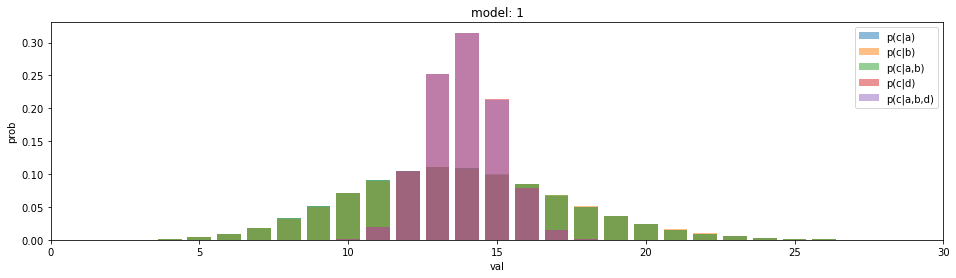


Posterior distributions, model 2:
a = 82
b = 550
d = 18
p(c|a)     E: 13.70   D: 13.79   time: 0.0138
p(c|b)     E: 13.75   D: 13.96   time: 0.0039
p(c|a,b)   E: 13.70   D: 13.70   time: 0.0038
p(c|d)     E: 13.89   D: 1.54    time: 0.0735
p(c|a,b,d) E: 13.89   D: 1.54    time: 0.0720


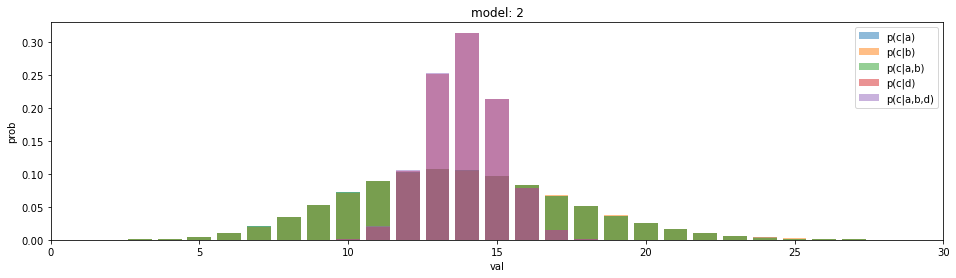

In [6]:
posteriors = [pc_a, pc_b, pc_ab, pc_d, pc_abd]

for model in (1, 2):
    print(f'\nPosterior distributions, model {model}:')

    # определим значения параметров a = Ea, b = Eb, d = Ed
    all_conds = {}
    for name in ('a', 'b', 'd'):
        v = round(distributions[model][f'p({name})']['E'])
        print(name + f' = {v}')
        v = np.array([v])
        all_conds[name] = v

    posteriors_names = []
    for posterior in posteriors:
        name, conds = posterior.__name__[1:].split('_')
        need_conds = {cond: all_conds[cond] for cond in conds}
        conds = ','.join(list(conds))
        name = f'p({name}|{conds})'

        start = time.time()
        prob, val = posterior(**need_conds, params=params, model=model)
        d_t = time.time() - start
        d_E = E(prob, val).take(-1)
        d_D = D(prob, val).take(-1)
        distributions[model][name] = {'prob': prob, 
                               'val': val, 
                               'E': d_E,
                               'D': d_D,
                               'time': d_t}
        print(f'{name:10} E: {d_E:<6.2f}  D: {d_D:<7.2f} time: {d_t:.4f}')
        posteriors_names.append(name)
    show_distribution(distributions[model], posteriors_names, f'model: {model}')

Как видно, для обеих моделей величина $d$ точнее всех остальных прогнозирует c: дисперсии $p(c|d)$ и $p(c|a,b,c)$ меньше почти в 10 раз, а распределения существенно ближе к $\sigma(c)$, чем у остальных апостериорных $p(c|...)$.

Так же в задании необходимо построить график распределения $p(c)$. Ради интереса построим так же график для $p(d)$.

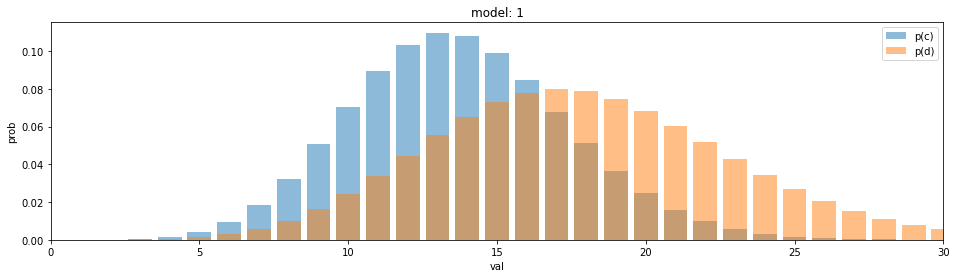

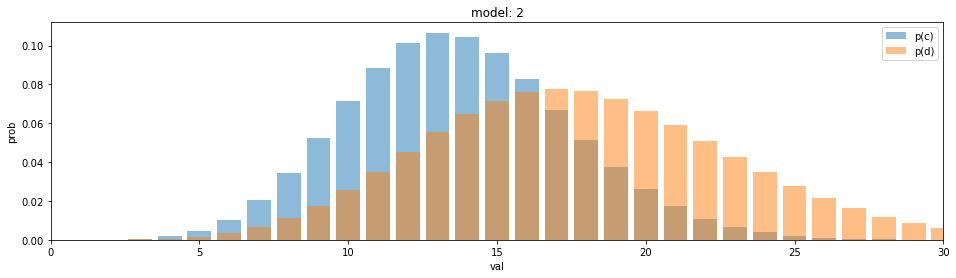

In [7]:
show_distribution(distributions[1], ['p(c)', 'p(d)'], f'model: {1}')
show_distribution(distributions[2], ['p(c)', 'p(d)'], f'model: {2}')

Получается довольно интересно: наглость студентов записывать своих друзей не катастрофически велика :)
Именно поэтому величина $d$ лучше всего предсказывает значение $c$. Инспектор, имея на руках список _теоретически_ присутствующих, наверняка знает, что число практически присутствующих не может превышать $d$ (студент, честно пришедший на лекцию, гаранированно отмечается), и при этом не меньше половины d, округленной в большую сторону, так как каждый студент не отмечает больше одного друга. Однако зная лишь общее число студентов на факультетах, число пришедших можно оценить от 0 (в худшем случае вроде субботы перед новогодними праздниками) до a + b (в лучшем случае, когда за посещение лекции ставят автоматы). Таким образом, знание числа отметившихся существенно сужает диапазон возможных значений величины $c$.

### 4.
**Определить, какая из величин $a, b, d$ вносит наибольший вклад в уточнение прогноза для величины $c$ (в смысле дисперсии распределения). Для этого проверить верно ли, что $\mathbb{D}[c|d] < \mathbb{D}[c|b]$ и $\mathbb{D}[c|d] < \mathbb{D}[c|a]$ для любых допустимых значений $a, b, d$. Найти множество точек $(a, b)$ таких, что $D[c|b] < D[c|a]$. Являются ли множества {$(a, b) | \mathbb{D}[c|b] < \mathbb{D}[c|a]$} и {$(a, b) | \mathbb{D}[c|b] ≥ \mathbb{D}[c|a]$} линейно разделимыми? Ответ должен быть обоснован!**

Вычислим дисперсии $\mathbb{D}[c|a], \mathbb{D}[c|b], \mathbb{D}[c|d]$ при всех возможных значениях параметров $a, b, d$ для обеих моделей:

In [8]:
ranges = {}
ranges['a'] = np.arange(params['amin'], params['amax'] + 1)
ranges['b'] = np.arange(params['bmin'], params['bmax'] + 1)
ranges['d'] = np.arange(2 * (params['amax'] + params['bmax']) + 1)

D_dict = {}
for model in (1, 2):
    str_model = str(model)
    D_c = D_dict[str_model] = {}
    D_c['D[c|a]'] = D(*pc_a(ranges['a'], params, model))
    D_c['D[c|b]'] = D(*pc_b(ranges['b'], params, model))
    D_c['D[c|d]'] = D(*pc_d(ranges['d'], params, model))

In [9]:
D_c['D[c|d]']

array([0.        , 0.        , 0.07632725, ..., 0.        , 0.        ,
       0.        ], dtype=float128)

Для каждой модели обозначим на плоскости $a, b$ с помощью цвета множества: \
{$(a, b)|\mathbb{D}[c|b] < \mathbb{D}[c|a]$} - точки $(a, b)$ фиолетового цвета\
{$(a, b)|\mathbb{D}[c|b] \geq \mathbb{D}[c|a]$} - точки $(a, b)$ желтого цвета

А так же проверим, верно ли, что $\mathbb{D}[c|d] < \mathbb{D}[c|b]$ и $\mathbb{D}[c|d] < \mathbb{D}[c|a]$ для любых допустимых значений $a, b, d$. Для этого сравним максимум $\mathbb{D}[c|d]$ среди всех значений $d$ с минимумом $\mathbb{D}[c|b]$ и $\mathbb{D}[c|a]$ среди всех значений $b$ и $a$ соответственно.

Теоретически, множества разделимы, так как \
$c = a_i + b_i$\
$\mathbb{D}c|a = \mathbb{D}a_i|a + \mathbb{D}b_i = ap_1(1-p_1) + \mathbb{D}b_i$ - последнее - константа по $a$\
$\mathbb{D}c|b = \mathbb{D}a_i + \mathbb{D}b_i|b = \mathbb{D}a_i + bp_2(1-p_2)$ - первое - константа по $b$

Значит, $\mathbb{D}[c|b] < \mathbb{D}[c|a] \iff:\\
\mathbb{D}a_i + bp_2(1-p_2) < ap_1(1-p_1) + \mathbb{D}b_i \iff \\
b < a\frac{p_1(1-p_1)}{p_2(1-p_2)} + \frac{(\mathbb{D}a_i - \mathbb{D}b_i)}{p_2(1-p_2)} = aw_1 + w_0$

Поскольку коэффициенты $w_0, w_1$ не зависят от конкретных значений $a, b$, а только от дисперсии их распределений и вероятностей $p_1, p_2$, то расчет коэффициентов можно вынести в отдельную функцию `line`

In [10]:
def line(params, model):
    D_ai = D(*pai(params, model))
    D_bi = D(*pbi(params, model))
    
    p1 = params['p1']
    p2 = params['p2']
    
    if model == 1:
        p1 *= (1 - p1)
        p2 *= (1 - p2)

    w_1 = p1 / p2
    w_0 = (D_bi - D_ai) / p2
    return w_1, w_0

Для каждой модели проверим, действительно прямая $b = aw_1 + w_0$ разделяет множества {$(a, b) | \mathbb{D}[c|b] < \mathbb{D}[c|a]$} и {$(a, b) | \mathbb{D}[c|b] ≥ \mathbb{D}[c|a]$} - то есть правда ли, что множество {$(a, b)|b < aw_1 + w_0$} совпадает с {$(a, b) | \mathbb{D}[c|b] < \mathbb{D}[c|a]$}

max D[c|d] = 10.5077 < 12.2800 = min D[c|a]: True
max D[c|d] = 10.5077 < 12.5875 = min D[c|b]: True

line b = 9.09a + -212.88 is True separation line


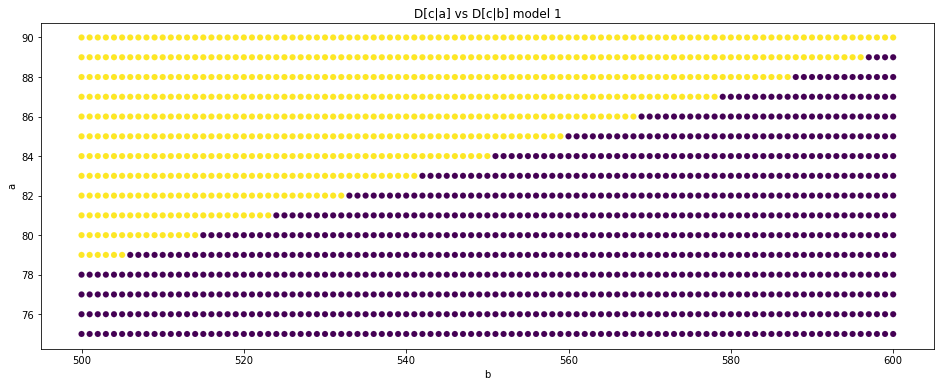

max D[c|d] = 13.4698 < 13.0850 = min D[c|a]: False
max D[c|d] = 13.4698 < 13.4625 = min D[c|b]: False

line b = 10.00a + -287.75 is True separation line


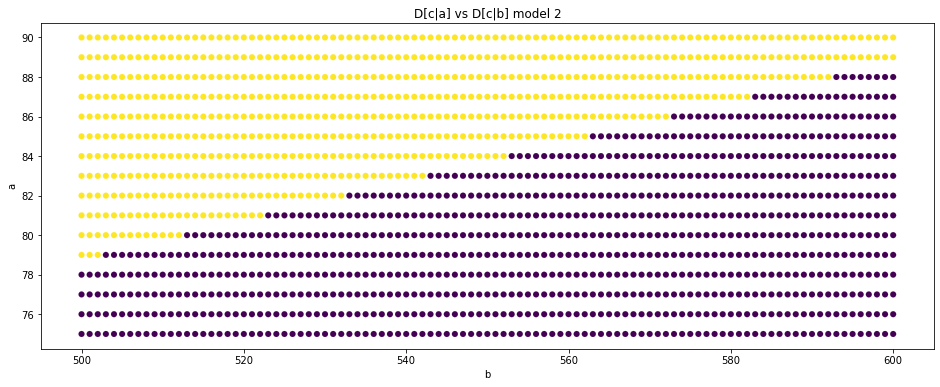

In [11]:
x, y = np.meshgrid(ranges['b'], ranges['a'])

for model in (1, 2):

    w_1, w_0 = line(params, model) 
    
    model = str(model)
    D_c = D_dict[model]
    D_c_d_max = D_c['D[c|d]'].max()
    D_c_a_min = D_c['D[c|a]'].min()
    D_c_b_min = D_c['D[c|b]'].min()
    
    DB, DA = np.meshgrid(D_dict[model]['D[c|b]'], 
                         D_dict[model]['D[c|a]'])
    color = (DB < DA).astype(np.int32)
    linear = (x < y * w_1 + w_0).astype(np.int32)
    sepline = (linear == color).all()
    
    print(f'max D[c|d] = {D_c_d_max:.4f} < {D_c_a_min:.4f} = min D[c|a]: {D_c_d_max < D_c_a_min}')
    print(f'max D[c|d] = {D_c_d_max:.4f} < {D_c_b_min:.4f} = min D[c|b]: {D_c_d_max < D_c_b_min}\n')
    print(f'line b = {w_1:.2f}a + {w_0:.2f} is {sepline} separation line')
    
    plt.figure(figsize=(16, 6))
    name = f'D[c|a] vs D[c|b] model {model}'
    plt.title(name)
    plt.scatter(x, y, c=color, linewidths=0.1)
    plt.ylabel('a')
    plt.xlabel('b')
    plt.show()

Отсюда видно, что:
1. $\mathbb{D}[c|d] < \mathbb{D}[c|b]$ и $\mathbb{D}[c|d] < \mathbb{D}[c|a]$ для любых допустимых значений $a, b, d$, что подтверждает результаты пункта 3.
2. Множества {$(a, b) | \mathbb{D}[c|b] < \mathbb{D}[c|a]$} и {$(a, b) | \mathbb{D}[c|b] ≥ \mathbb{D}[c|a]$} являются линейно разделимыми

### 5.
**Провести временные замеры по оценке всех необходимых распределений $p(c), p(c|a), p(c|b), p(c|d), p(c|a, b), p(c|a, b, d), p(d)$.**

Все замеры времени были проведены в пункте 1.

### 6.

**Используя результаты всех предыдущих пунктов, сравнить две модели. Показать где максимально проявляется разница между ними (привести конкретный пример, не обязательно из экспериментов выше). Объяснить причины подобного результата.**

Изначально (в пункте 1) можно было видеть отличие дисперсий у распределений $p(c|a), p(c|b), p(c|d)$.\
Визуализируем это:

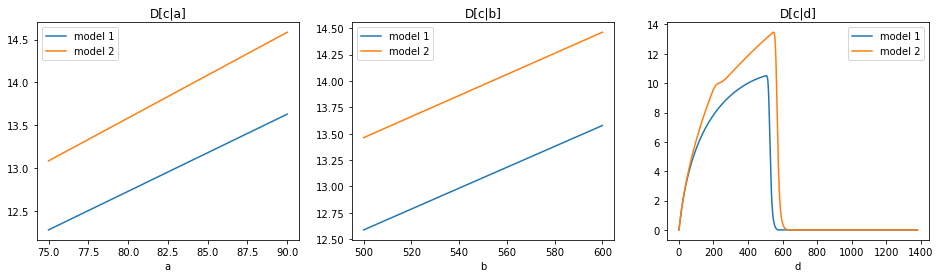

In [12]:
plt.figure(figsize=(16, 4))
for i, name in enumerate(('D[c|a]', 'D[c|b]', 'D[c|d]')):
    plt.subplot(1, 3, i + 1)
    plt.title(name)
    cond = name[-2]
    plt.plot(ranges[cond], D_dict['1'][name], label=f'model 1')
    plt.plot(ranges[cond], D_dict['2'][name], label=f'model 2')
    plt.xlabel(cond)
    plt.legend()
    
plt.show()

Видно, что у первой модели дисперсии меньше, чем у второй.

Однако изначальное отличие модели крылось в разнице распределений $c|a, b$:\
$c|a,b \sim \mathcal{B}(a,p_1) + \mathcal{B}(b,p_2)$ - Первая вероятностная модель\
$c|a,b \sim \mathcal{Poiss}(ap_1 + bp_2)$ - Вторая вероятностная модель\
Посмотрим, насколько они отличаются визуально.

Так же известно, что сумма пуассоновских распределений дает пуассоновское, а вот сумма биномиальных не дает биномиального. 

1. Доказательствл первого факта довольно тривиальное (через функцию вероятности и свертку в биномиальные коэффициенты, было на семинаре).
2. Допустим, что второй факт неверен, и можно найти биномиальное распределение $B(c, p)$, совпадающее с суммой данных биномиальных $B_1(a, p1)$, $B_2(b, p2)$:

Тогда совпадают моменты:
$\left\{ \begin{array}{}
\mathbb{E}[B] = cp = \mathbb{E}[B_1 + B_2] = ap_1 + bp_2\\
\mathbb{D}[B] = cp(1-p) = \mathbb{D}[B_1 + B_2] = ap_1(1-p_1) + bp_2(1-p_2)\\
\end{array}\right. \Rightarrow 
\left\{ \begin{array}{}
cp = ap_1 + bp_2\\
cp(1-p) = ap_1(1-p_1) + bp_2(1-p_2)\\
\end{array}\right. \Rightarrow 
\left\{ \begin{array}{}
c = \frac{ap_1 + bp_2}{p}\\
p = 1 - \frac{ap_1(1-p_1) + bp_2(1-p_2)}{ap_1 + bp_2}\\
\end{array}\right. \Rightarrow
\left\{ \begin{array}{}
c = \frac{ap_1 + bp_2}{p}\\
p = \frac{ap_1^2 + bp_2^2}{ap_1 + bp_2}\\
\end{array}\right. \Rightarrow
\left\{ \begin{array}{}
c = \frac{(ap_1 + bp_2)^2}{ap_1^2 + bp_2^2}\\
p = \frac{ap_1^2 + bp_2^2}{ap_1 + bp_2}\\
\end{array}\right.$

Проверим с помощью эксперимента, совпадают ли распределения:
1. $p(c|a,b)$ для модели 1 и $p(c|a,b)$ для модели 2
2. $\mathcal{Poiss}(a,p_1) + \mathcal{Poiss}(b,p_2)$ и $\mathcal{Poiss}(ap_1 + bp_2)$
3. $\mathcal{B}(a,p_1) + \mathcal{B}(b,p_2)$ и $\mathcal{B}(с,p)$

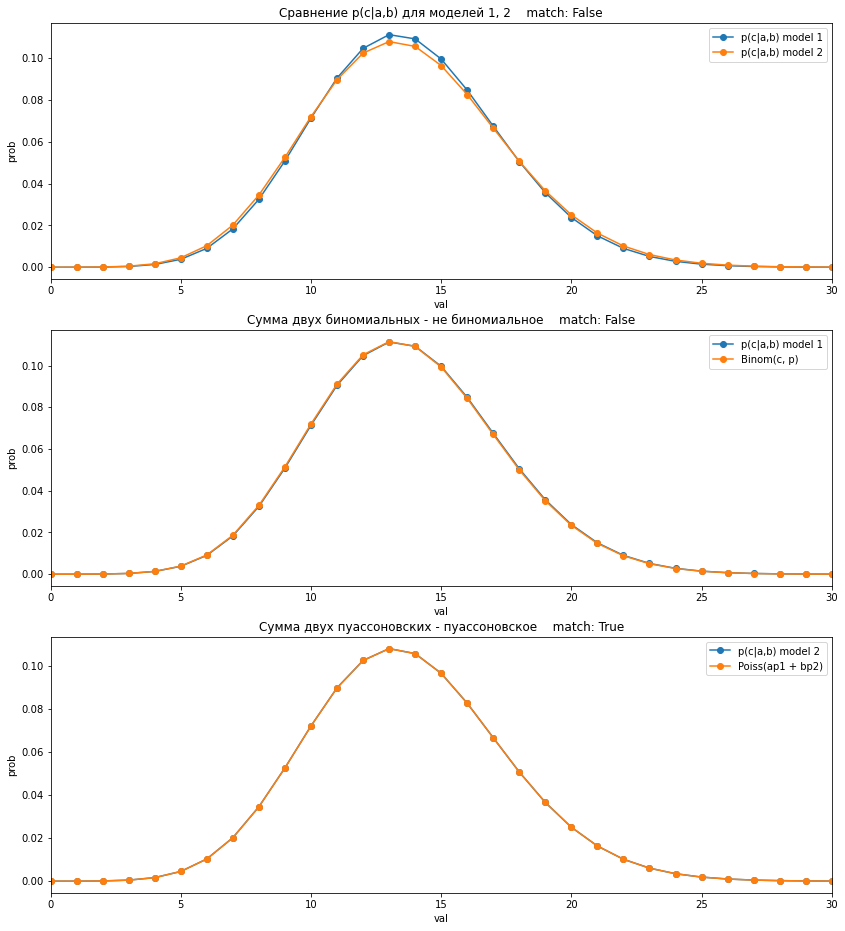

In [13]:
dstrb_1 = distributions[1]['p(c|a,b)']
dstrb_2 = distributions[2]['p(c|a,b)']
prob_1 = dstrb_1['prob'].ravel()[:31]
prob_2 = dstrb_2['prob'].ravel()[:31]
val = dstrb_1['val'][:31]

a = all_conds['a']
b = all_conds['b']
p1 = params['p1']
p2 = params['p2']

c = a*p1 + b*p2
p = (a*p1*p1 + b*p2*p2) / c
c = int(c / p)

probs = [(prob_1, prob_2),
         (prob_1, binom(c, val, p)),
         (prob_2, poiss(val, a*p1 + b*p2))]

labels = [('p(c|a,b) model 1', 'p(c|a,b) model 2'),
          ('p(c|a,b) model 1', 'Binom(c, p)'),
          ('p(c|a,b) model 2', 'Poiss(ap1 + bp2)')]

titles = ['Сравнение p(c|a,b) для моделей 1, 2',
          'Сумма двух биномиальных - не биномиальное',
          'Сумма двух пуассоновских - пуассоновское']

plt.figure(figsize=(14, 16))
for i in range(3):
    plt.subplot(3, 1, i+1)
    match = np.allclose(probs[i][0], probs[i][1])
    plt.title(titles[i] + f'    match: {match}')
    plt.plot(val, probs[i][0], '-o', label=labels[i][0])
    plt.plot(val, probs[i][1], '-o', label=labels[i][1])
    plt.legend()
    plt.ylabel('prob')
    plt.xlabel('val')
    plt.xlim(0, 30)

plt.show()

Как видно, первые два распределения не совпадают (match = False), а последние - совпадают. Результаты эксперимента подтверждают теорию. 
А так же 2 модель "сохраняет" распределение относительно суммы, а 1 - нет.

In [14]:
np.set_printoptions(suppress=False)

In [15]:
pd_c(np.array([15]), params, 2)[0][20]

array([0.20613038], dtype=float128)